In [1]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os
import cv2
from scipy import optimize
from pylab import *

# import imutils
import cv2
import csv

import struct
import bz2

256 256



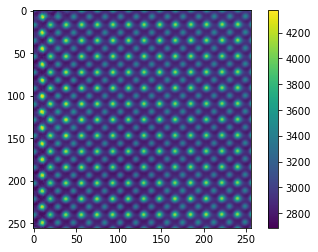

In [19]:
path = 'D:/2020/NRRpaper_data/RegistrationParameters&results/ParameterTest/Lambda/100/HAADF_NRR/stage3/average.q2bz'
# read header in read text mode
fid = bz2.open(path, mode='rt',encoding = "ISO-8859-1")
next(fid)    # magic number P9, skip
#     print(fid.readline())   # description line
fid.readline()    # do not print, but read the description line
size = fid.readline()   # image size in width, height
print(size)
width = int(size.split(' ')[0])
height = int(size.split(' ')[1][:-1])
#     print(width, height)
#     print(fid.readline())   # max?
# each number is a 8 byte double format

# read data part in read binary mode
img = np.zeros((height,width))
fid = bz2.open(path, mode='rb')
for _ in range(4):
    next(fid)
for icol in range(width):
    for irow in range(height):
        read_bytes = fid.read(8)
        img[irow,icol] = struct.unpack('d',read_bytes)[0]

plt.imshow(img)
plt.colorbar()
# return img

7
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/StartLevel/5/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/StartLevel/3/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/StartLevel/4/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/StartLevel/2/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/StartLevel/8/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/StartLevel/7/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/StartLevel/6/HAADF_NRR/stage3/


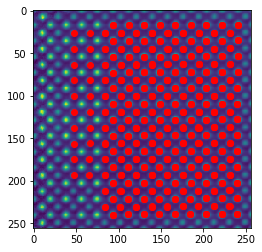

In [10]:
path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/StartLevel/*/HAADF_NRR/stage3/'
num = len(glob.glob(path))
print(num)
prec_array_startlevel = np.zeros((num,3)) # three columns to save xprec, yprec, and the varying parameter
for i in range(num):
# i=3
    print(glob.glob(path)[i])
    path_img = glob.glob(path)[i] + 'average.q2bz'
    path_nSamples = glob.glob(path)[i] + 'numSamples.q2bz'
    img = LoadImage(path_img)
    nSamples = LoadNumSamples(path_nSamples)
    xprec, yprec = PrecisionFromFitting(img,nSamples)
    prec_array_startlevel[i,0:2] = [xprec,yprec]
    prec_array_startlevel[i,2] = float(glob.glob(path)[i].split('/')[8])

NameError: name 'ax' is not defined

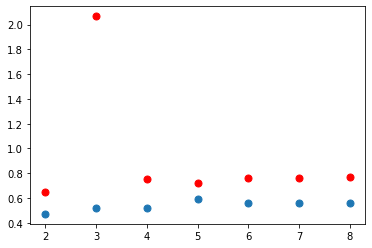

In [12]:
plt.plot(prec_array_startlevel[:,2],prec_array_startlevel[:,0]*21.5,'.',markersize=14,label='Fast scan')
plt.plot(prec_array_startlevel[:,2],prec_array_startlevel[:,1]*21.5,'.',markersize=14,c='r',label='Slow scan')
ax.tick_params(direction='in')
ax.set_xscale('log')
plt.grid('on')
plt.xlabel('Start Level',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14, loc='upper right')

## Lambda, stop threshold, lambda factor, registration stages

(3.5, 8.5)

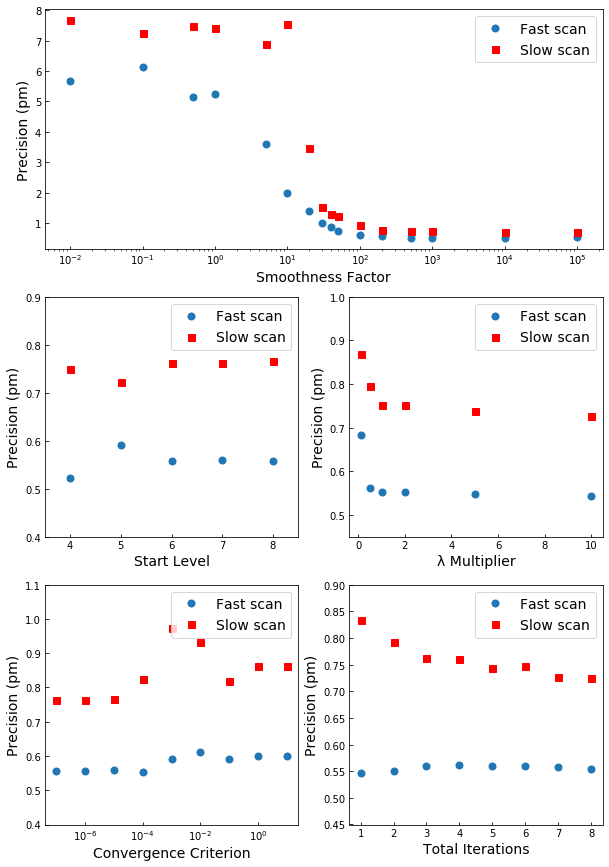

In [21]:
# Plot precision vs different parameters: lambda, stop threhold, lambda factor, registration stages, and start level
# Emphasize the effect of lambda by plotting it larger
fig = plt.figure(figsize=(10,15))
grid = plt.GridSpec(3,2)

ax = plt.subplot(grid[0,:])
plt.plot(prec_array_lambda[:,2],prec_array_lambda[:,0]*21.5,'o',markersize=7,label='Fast scan')
plt.plot(prec_array_lambda[:,2],prec_array_lambda[:,1]*21.5,'s',markersize=7,c='r',label='Slow scan')
ax.set_xscale('log')
ax.tick_params(direction='in')
plt.xlabel('Smoothness Factor',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14)

ax = plt.subplot(grid[2,0])
plt.plot(prec_array_epsilon[:,2],prec_array_epsilon[:,0]*21.5,'o',markersize=7,label='Fast scan')
plt.plot(prec_array_epsilon[:,2],prec_array_epsilon[:,1]*21.5,'s',markersize=7,c='r',label='Slow scan')
ax.set_xscale('log')
ax.tick_params(direction='in')
# plt.grid('on')
plt.xlabel('Convergence Criterion',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14, loc='upper right')
ax.set_ylim([0.4,1.1])

ax = plt.subplot(grid[1,1])
plt.plot(prec_array_lambdafactor[:,2],prec_array_lambdafactor[:,0]*21.5,'o',markersize=7,label='Fast scan')
plt.plot(prec_array_lambdafactor[:,2],prec_array_lambdafactor[:,1]*21.5,'s',markersize=7,c='r',label='Slow scan')
ax.tick_params(direction='in')
# ax.set_xscale('log')
# plt.grid('on')
plt.xlabel('\u03BB Multiplier',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14, loc='upper right')
ax.set_ylim([0.45,1.0])

ax = plt.subplot(grid[2,1])
plt.plot(prec_array_extrastage[:,2],prec_array_extrastage[:,0]*21.5,'o',markersize=7,label='Fast scan')
plt.plot(prec_array_extrastage[:,2],prec_array_extrastage[:,1]*21.5,'s',markersize=7,c='r',label='Slow scan')
ax.tick_params(direction='in')
# plt.grid('on')
plt.xlabel('Total Iterations',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14)
ax.set_ylim([0.45,0.9])

ax = plt.subplot(grid[1,0])
plt.plot(prec_array_startlevel[:,2],prec_array_startlevel[:,0]*21.5,'o',markersize=7,label='Fast scan')
plt.plot(prec_array_startlevel[:,2],prec_array_startlevel[:,1]*21.5,'s',markersize=7,c='r',label='Slow scan')
ax.tick_params(direction='in')
plt.xlabel('Start Level',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14, loc='upper right')
ax.set_ylim([0.4,0.9])
ax.set_xlim([3.5,8.5])

(0.45, 0.9)

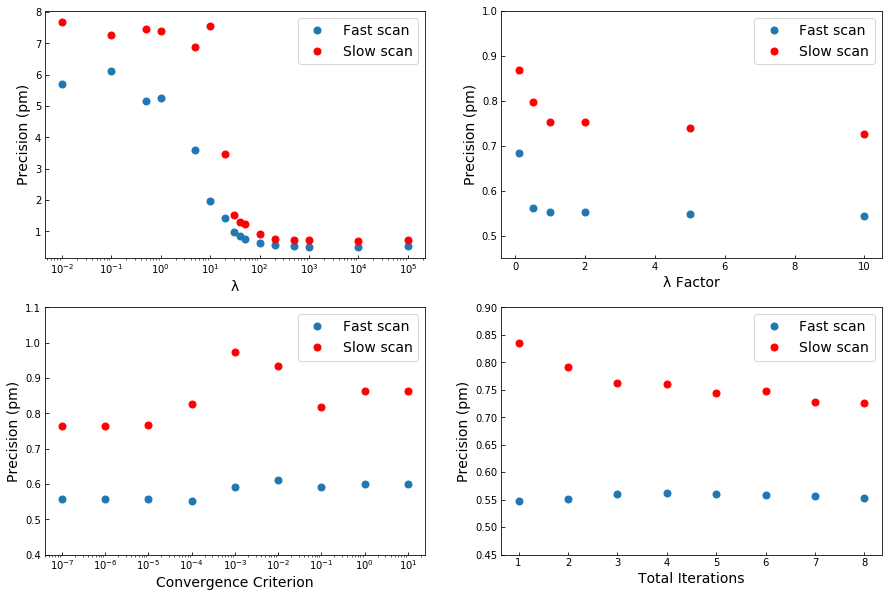

In [17]:
# Plot precision vs different parameters: lambda, stop threhold, lambda factor, registration stages
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
plt.plot(prec_array_lambda[:,2],prec_array_lambda[:,0]*21.5,'.',markersize=14,label='Fast scan')
plt.plot(prec_array_lambda[:,2],prec_array_lambda[:,1]*21.5,'.',markersize=14,c='r',label='Slow scan')
ax.set_xscale('log')
ax.tick_params(direction='in')
# plt.grid('on')
plt.xlabel('\u03BB',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14)

ax = fig.add_subplot(223)
plt.plot(prec_array_epsilon[:,2],prec_array_epsilon[:,0]*21.5,'.',markersize=14,label='Fast scan')
plt.plot(prec_array_epsilon[:,2],prec_array_epsilon[:,1]*21.5,'.',markersize=14,c='r',label='Slow scan')
ax.set_xscale('log')
ax.tick_params(direction='in')
# plt.grid('on')
plt.xlabel('Convergence Criterion',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14, loc='upper right')
ax.set_ylim([0.4,1.1])

ax = fig.add_subplot(222)
plt.plot(prec_array_lambdafactor[:,2],prec_array_lambdafactor[:,0]*21.5,'.',markersize=14,label='Fast scan')
plt.plot(prec_array_lambdafactor[:,2],prec_array_lambdafactor[:,1]*21.5,'.',markersize=14,c='r',label='Slow scan')
ax.tick_params(direction='in')
# ax.set_xscale('log')
# plt.grid('on')
plt.xlabel('\u03BB Factor',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14, loc='upper right')
ax.set_ylim([0.45,1.0])

ax = fig.add_subplot(224)
plt.plot(prec_array_extrastage[:,2],prec_array_extrastage[:,0]*21.5,'.',markersize=14,label='Fast scan')
plt.plot(prec_array_extrastage[:,2],prec_array_extrastage[:,1]*21.5,'.',markersize=14,c='r',label='Slow scan')
ax.tick_params(direction='in')
# plt.grid('on')
plt.xlabel('Total Iterations',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14)
ax.set_ylim([0.45,0.9])

17
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/200/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/30/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/40/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/0/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/1000/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/5/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/50/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/0.01/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/10000/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/500/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/100/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/100000/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/0.1/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/0.5/HAADF_N

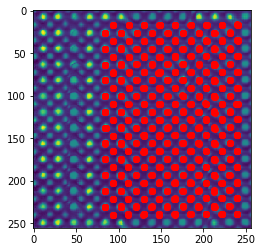

In [11]:
path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/*/HAADF_NRR/stage3/'
num = len(glob.glob(path))
print(num)
prec_array_lambda = np.zeros((num,3)) # three columns to save xprec, yprec, and the varying parameter
for i in range(num):
    print(glob.glob(path)[i])
    path_img = glob.glob(path)[i] + 'average.q2bz'
    path_nSamples = glob.glob(path)[i] + 'numSamples.q2bz'
    img = LoadImage(path_img)
    nSamples = LoadNumSamples(path_nSamples)
    xprec, yprec = PrecisionFromFitting(img,nSamples)
    prec_array_lambda[i,0:2] = [xprec,yprec]
    prec_array_lambda[i,2] = float(glob.glob(path)[i].split('/')[8])

6
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/LambdaFactor/5/HAADF_NRR/stage3/
0.02545551998966654 0.03438083348714334
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/LambdaFactor/2/HAADF_NRR/stage3/
0.02573618105117494 0.035015868296634695
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/LambdaFactor/0.1/HAADF_NRR/stage3/
0.03180578611096308 0.04043462328838185
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/LambdaFactor/0.5/HAADF_NRR/stage3/
0.026154137770101202 0.03704099961327831
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/LambdaFactor/10/HAADF_NRR/stage3/
0.025283956507745616 0.033808617881534345
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/LambdaFactor/1/HAADF_NRR/stage3/
0.02573618105117494 0.035015868296634695


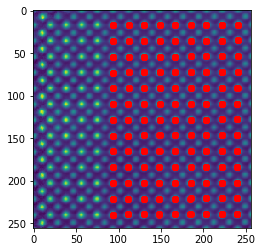

In [12]:
path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/LambdaFactor/*/HAADF_NRR/stage3/'
num = len(glob.glob(path))
print(num)
prec_array_lambdafactor = np.zeros((num,3)) # three columns to save xprec, yprec, and the varying parameter
for i in range(num):
    print(glob.glob(path)[i])
    path_img = glob.glob(path)[i] + 'average.q2bz'
    path_nSamples = glob.glob(path)[i] + 'numSamples.q2bz'
    img = LoadImage(path_img)
    nSamples = LoadNumSamples(path_nSamples)
    xprec, yprec = PrecisionFromFitting(img,nSamples)
    print(xprec,yprec)
    prec_array_lambdafactor[i,0:2] = [xprec,yprec]
    prec_array_lambdafactor[i,2] = float(glob.glob(path)[i].split('/')[8])


9
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Epsilon/1e-4/HAADF_NRR/stage3/
0.0001
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Epsilon/1e-7/HAADF_NRR/stage3/
1e-07
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Epsilon/1e-1/HAADF_NRR/stage3/
0.1
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Epsilon/1e-6/HAADF_NRR/stage3/
1e-06
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Epsilon/1e-3/HAADF_NRR/stage3/
0.001
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Epsilon/1e-2/HAADF_NRR/stage3/
0.01
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Epsilon/10/HAADF_NRR/stage3/
10.0
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Epsilon/1e-5/HAADF_NRR/stage3/
1e-05
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Epsilon/1/HAADF_NRR/stage3/
1.0


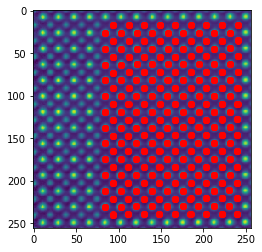

In [13]:
path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Epsilon/*/HAADF_NRR/stage3/'
num = len(glob.glob(path))
print(num)
prec_array_epsilon = np.zeros((num,3)) # three columns to save xprec, yprec, and the varying parameter
for i in range(num):
    print(glob.glob(path)[i])
    path_img = glob.glob(path)[i] + 'average.q2bz'
    path_nSamples = glob.glob(path)[i] + 'numSamples.q2bz'
    img = LoadImage(path_img)
    nSamples = LoadNumSamples(path_nSamples)
    xprec, yprec = PrecisionFromFitting(img,nSamples)
    prec_array_epsilon[i,0:2] = [xprec,yprec]
    prec_array_epsilon[i,2] = float(glob.glob(path)[i].split('/')[8])
    print(prec_array_epsilon[i,2])

8
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/ExtraStage/HAADF_NRR/stage4/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/ExtraStage/HAADF_NRR/stage2/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/ExtraStage/HAADF_NRR/stage7/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/ExtraStage/HAADF_NRR/stage1/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/ExtraStage/HAADF_NRR/stage8/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/ExtraStage/HAADF_NRR/stage3/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/ExtraStage/HAADF_NRR/stage6/
/srv/home/chenyu/NRR/STO_NRR/ParameterTest/ExtraStage/HAADF_NRR/stage5/


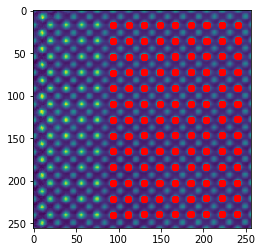

In [14]:
path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/ExtraStage/HAADF_NRR/stage*/'
num = len(glob.glob(path))
print(num)
prec_array_extrastage = np.zeros((num,3)) # three columns to save xprec, yprec, and the varying parameter
for i in range(num):
    print(glob.glob(path)[i])
    path_img = glob.glob(path)[i] + 'average.q2bz'
    path_nSamples = glob.glob(path)[i] + 'numSamples.q2bz'
    img = LoadImage(path_img)
    nSamples = LoadNumSamples(path_nSamples)
    xprec, yprec = PrecisionFromFitting(img,nSamples)
    prec_array_extrastage[i,0:2] = [xprec,yprec]
    prec_array_extrastage[i,2] = float(glob.glob(path)[i].split('/')[-2][-1:])

In [21]:
plt.plot(prec_array_lambdafactor[:,2],prec_array_lambdafactor[:,0]*21.5,'.',markersize=14,label='Fast scan')
plt.plot(prec_array_lambdafactor[:,2],prec_array_lambdafactor[:,1]*21.5,'.',markersize=14,c='r',label='Slow scan')
ax.tick_params(direction='in')
ax.set_xscale('log')
plt.grid('on')
plt.xlabel('Lambda Factor',fontsize=14)
plt.ylabel('Precision (pm)', fontsize=14)
plt.legend(fontsize=14, loc='upper right')

NameError: name 'prec_array_lambdafactor' is not defined

0.2445494982909033 0.3446545085346527


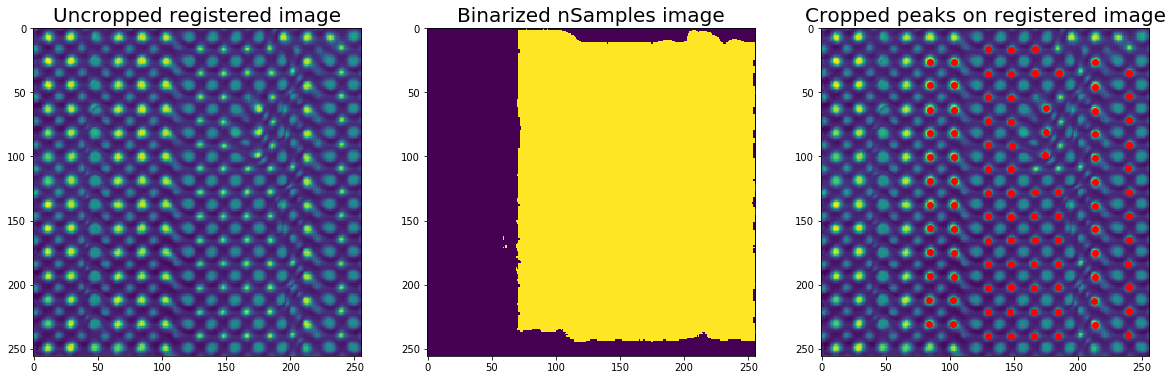

In [137]:
# Test functions on a single file
fig = plt.figure(figsize=(20,10))
path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/1/HAADF_NRR/stage3/average.q2bz'
fig.add_subplot(1,3,1)
img = LoadImage(path)
plt.imshow(img)
plt.title('Uncropped registered image',fontsize=20)

path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/1/HAADF_NRR/stage3/numSamples.q2bz'
nSamples = LoadNumSamples(path)
fig.add_subplot(1,3,2)
plt.imshow(nSamples)
plt.title('Binarized nSamples image',fontsize=20)

fig.add_subplot(1,3,3)
xprec, yprec = PrecisionFromFitting(img,nSamples)
plt.title('Cropped peaks on registered image',fontsize=20)
print(xprec,yprec)

In [2]:
def LoadImage(path):
#     path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/100/HAADF_NRR/stage3/average.q2bz'
    # read header in read text mode
    fid = bz2.open(path, mode='rt',encoding = "ISO-8859-1")
    next(fid)    # magic number P9, skip
#     print(fid.readline())   # description line
    fid.readline()    # do not print, but read the description line
    size = fid.readline()   # image size in width, height
    width = int(size.split(' ')[0])
    height = int(size.split(' ')[1][:-1])
#     print(width, height)
#     print(fid.readline())   # max?
    # each number is a 8 byte double format

    # read data part in read binary mode
    img = np.zeros((height,width))
    fid = bz2.open(path, mode='rb')
    for _ in range(4):
        next(fid)
    for icol in range(width):
        for irow in range(height):
            read_bytes = fid.read(8)
            img[irow,icol] = struct.unpack('d',read_bytes)[0]

#     plt.imshow(img)
#     plt.colorbar()
    return img

In [3]:
def LoadNumSamples(path):
    # crop image accroding to numsamples
#     path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/100/HAADF_NRR/stage3/numSamples.q2bz'
    # read header in read text mode
    fid = bz2.open(path, mode='rt',encoding = "ISO-8859-1")
    next(fid)    # magic number P9, skip
    # print(fid.readline())   # description line
    fid.readline()
    size = fid.readline()   # image size in width, height
    width = int(size.split(' ')[0])
    height = int(size.split(' ')[1][:-1])
    # print(width, height)
    # print(fid.readline())   # max?
    # each number is a 8 byte double format

    # read data part in read binary mode
    nSamples = np.zeros((height,width))
    fid = bz2.open(path, mode='rb')
    for _ in range(4):
        next(fid)
    for icol in range(width):
        for irow in range(height):
            read_bytes = fid.read(8)
            nSamples[irow,icol] = struct.unpack('d',read_bytes)[0]

    nSamples = np.heaviside(nSamples-np.amax(nSamples),1)

#     plt.imshow(nSamples)
#     plt.colorbar()
    return nSamples

In [4]:
# Calculate precision (std) from 2D Gaussian fitting
def PrecisionFromFitting(img,nSamples):
    image_max = ndi.maximum_filter(img, size=10, mode='constant')
    coordinates = peak_local_max(img, min_distance=15)
    plt.imshow(img)
    # plt.scatter(coordinates[:,0],coordinates[:,1])

    peaks_x_fit = []
    peaks_y_fit = []

    for i in range(coordinates.shape[0]):

        x = int(coordinates[i][1])
        y = int(coordinates[i][0])
        if nSamples[y,x] == 0:
            continue

        if x >=7 and y>=7:
            patch = img[y-6:y+6,x-6:x+6]
            patch = patch - amin(patch)
            bg = 0

            # parameters are in the order of : background, height, cx, cy, wx, wy
            guess = (bg,patch[6,6]-bg,6, 6, 3, 3)
            bounds = ([0,0,0,0,1,1],[np.inf,np.inf,10,10,10,10])
            param = fitGaussianx2(patch, guess, bounds)

            peaks_x_fit.append(param[2]+x-6)
            peaks_y_fit.append(param[3]+y-6)

    plt.scatter(peaks_x_fit, peaks_y_fit,c='r')
    # separations are currently hard coded as 19px, returned values are precision in pixels
    xprec = FindXStd(np.asarray(peaks_x_fit),np.asarray(peaks_y_fit),19)
    yprec = FindYStd(np.asarray(peaks_x_fit),np.asarray(peaks_y_fit),19)
    return yprec, xprec

In [5]:
# Old precision calculation function using csv file, not in use here
def FindPrecision(csvFileName,txtFileName,threshold,separation):
    start = 0
    with open(csvFileName) as csvfile:
        file=csv.reader(open(csvFileName,'r'))
        peaks_x = []
        peaks_y = []
        for row in file:
            if start == 0:
                start = 1
                continue
            peaks_x.append(float(row[0]))
            peaks_y.append(float(row[1]))

    with open(txtFileName) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content];

    peaks_int = []
    for i in range(len(peaks_x)):
        peaks_int.append(float(content[i*3+2]))
        
    array_x = np.asarray(peaks_x)
    array_y = np.asarray(peaks_y)
    array_int = np.asarray(peaks_int)
    index = np.where((array_x>10) & (array_x<140) & (array_y > 10) & (array_y < 140))
    array_x = array_x[index]
    array_y = array_y[index]
    array_int = array_int[index]
        
    lattice1 = np.where(array_int>threshold)
    array_x1 = array_x[lattice1]
    array_y1 = array_y[lattice1]
    array_int1 = array_int[lattice1]

    return FindYStd(array_x1,array_y1,separation),FindXStd(array_x1,array_y1,separation)

In [6]:
def FindYStd(array_x1_copy,array_y1_copy,separation):
    y_sep = []
    while array_x1_copy.size != 0:
        x_cor = array_x1_copy[0]
        index = np.where((array_x1_copy<x_cor+3) & (array_x1_copy>x_cor-3))
        array_y_sub = array_y1_copy[index]
        array_y_sub = np.sort(array_y_sub)
        for i in range(array_y_sub.shape[0]-1):
            spacing = array_y_sub[i+1] - array_y_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                y_sep.append(spacing)
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    y_std = np.std(np.asarray(y_sep))
    return y_std

In [7]:
def FindXStd(array_x1_copy,array_y1_copy,separation):
    x_sep = []
    while array_x1_copy.size != 0:
        y_cor = array_y1_copy[0]
        index = np.where((array_y1_copy<y_cor+3) & (array_y1_copy>y_cor-3))
        array_x_sub = array_x1_copy[index]
        array_x_sub = np.sort(array_x_sub)
        for i in range(array_x_sub.shape[0]-1):
            spacing = array_x_sub[i+1] - array_x_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                x_sep.append(array_x_sub[i+1] - array_x_sub[i])
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    x_std = np.std(np.asarray(x_sep))
    return x_std

In [8]:
def fitGaussianx2(data, guess, bounds):
    x = np.linspace(0, data.shape[1]-1, data.shape[1])
    y = np.linspace(0, data.shape[0]-1, data.shape[0])
    x, y = np.meshgrid(x, y)
    xdata_tuple = (x,y)
    popt, pcov = optimize.curve_fit(gaussianx2, xdata_tuple, data.ravel(), p0=guess,bounds=bounds,method='trf',verbose=0,maxfev=100000)
    return popt

In [9]:
def gaussianx2(xdata_tuple,bg,height, center_x, center_y, width_x, width_y):

    (x, y) = xdata_tuple
    width_x = float(width_x)
    width_y = float(width_y)
    g = height*exp(
                 -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)+bg
    return g.ravel()

In [44]:
from PIL import Image
im = Image.open('/srv/home/chenyu/NRR/STO_NRR/030417_S2/PACBED_pre.tif')
imarray = np.array(im)

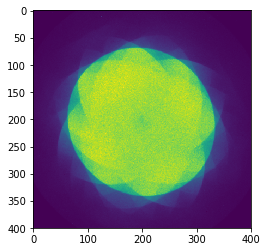

In [50]:
plt.imshow(imarray[100:500,320:720])

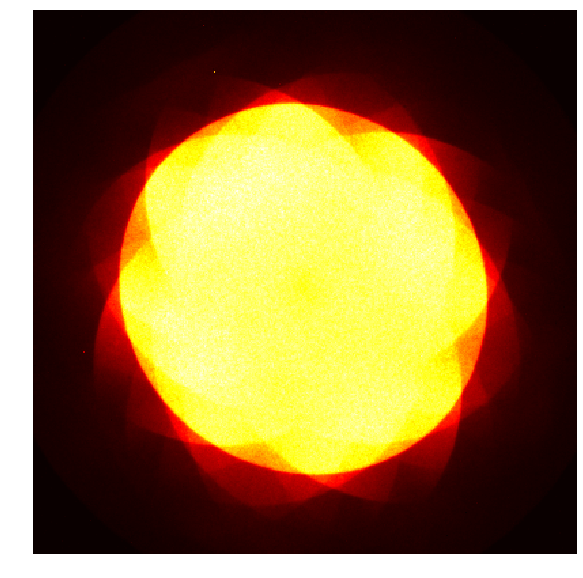

In [52]:
fig = plt.figure(figsize=(10,10))
plt.imshow(imarray[100:500,320:720], cmap='hot')
plt.axis('off')
fig.savefig('/srv/home/chenyu/NRR/STO_NRR/030417_S2/PACBED_sqrt_heatmap.tiff')